# Investigating the Impact of Austin's Rapid Growth on Travis County and Surrounding Counties

## Data Collection:
To answer the question of how the recent population growth in Austin and the surrounding counties affected the local school performance metrics, we utilized the API from SchoolDigger.com which is an online database with detailed records of schools from across the nation. The metrics we collected from the SchoolDigger database included school ranking information, standardized test score data, and latitude and longitude values for each school for the years 2019, 2021, and 2022. Unfortunately, due to Covid, there is not any school data reported for the year 2020.
## Cleaning Data:
There were some schools in the SchoolDigger database that did not report test score data or school ranking data. Additionally, some schools had missing data for the years we were interested in. Consequentially, we populated the data frames with null values and then dropped the relevant rows to enable our analysis. 
## Visualizations:
We chose to create scatter plots to represent the metrics as a function of distance to the Austin city center because we expected the outer counties to perform better as their population grew over the past few years. We used linear regression to determine the strength of the correlation between our metrics and the distance to the Austin city center by comparing the calculated r values. Additionally, hvPlots were created to provide a visualization of the test scores by coordinates. 
## Statistical Analysis:
The SchoolDigger database ranks each school in the state by the average “standard score” of the school. The database calculates a z-score to determine the multiple standard deviations of the schools’ test scores from the state mean test scores, and then maps those z-scores using a standard normal distribution to return a “standard score” for each school. 
## Conclusion:
The net rank movements of each school per year from 2019 to 2021 were more closely, negatively correlated (r value of approx. -0.364) with distance to the city center than the net rank movements per year from 2021 to 2022 (r value of approx. -0.305) which indicates that distance has less of an impact as the years have progressed. Breaking down this data set by elementary, middle, and high school bins showed that each subset also had a decreased correlation by distance as time progressed. Additionally, elementary schools were more strongly impacted by distance than middle schools which were more strongly impacted by distance than high schools. The standard scores themselves show a weaker correlation to distance than the rank movements, but these also flatten out over time. 


In [2]:
# Dependencies and Setup
import hvplot.pandas
import pandas as pd
import geopy.distance
from pathlib import Path
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Import the API key
from school_digger_api_key import geoapify_key

In [3]:
#read in csvs to establish dataframes from earlier api calls
school_data_22_19= Path("../P1_Resources/school_data_22-19.csv")
school_data_22_19_df=pd.read_csv(school_data_22_19)
school_data_22_21 = Path("../P1_Resources/school_data_22-21.csv")
school_data_22_21_df=pd.read_csv(school_data_22_21)

In [4]:
#set up of coordinate ararys for distance comparison
austincoord=(30.267200,-97.743100)
lats_22_21=school_data_22_21_df['lats'].to_numpy()
lats_22_19=school_data_22_19_df['lats'].to_numpy()
longs_22_21=school_data_22_21_df['longs'].to_numpy()
longs_22_19=school_data_22_19_df['longs'].to_numpy()
ditsance_to_austin_center_22_21=[]
ditsance_to_austin_center_22_19=[]

In [5]:
#for loops to generate distance values
for i in range(len(lats_22_21)):
    coord=(lats_22_21[i],longs_22_21[i])
    ditsance_to_austin_center_22_21.append(geopy.distance.geodesic(coord, austincoord).km)
for i in range(len(lats_22_19)):
    coord=(lats_22_19[i],longs_22_19[i])
    ditsance_to_austin_center_22_19.append(geopy.distance.geodesic(coord, austincoord).km)

In [6]:
#add distance data to data frame and convert distance to miles
school_data_22_21_df['Distance_to_City_Center']=ditsance_to_austin_center_22_21
school_data_22_19_df['Distance_to_City_Center']=ditsance_to_austin_center_22_19
school_data_22_21_df['Distance_to_City_Center']=school_data_22_21_df['Distance_to_City_Center']/1.609344
school_data_22_19_df['Distance_to_City_Center']=school_data_22_19_df['Distance_to_City_Center']/1.609344



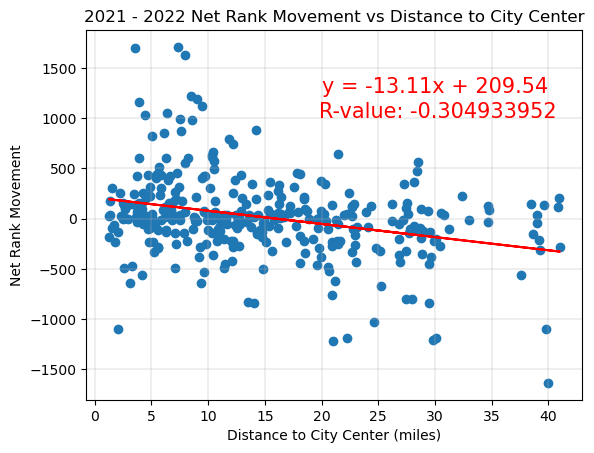

In [7]:
#2021 - 2022 Net Rank Movement vs Distance to City Center plot and linear regression
x_values = school_data_22_21_df['Distance_to_City_Center']
y_values = school_data_22_21_df['rankMovements']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_value=f"R-value: {round(rvalue,9)}"
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,1250),fontsize=15,color="red")
plt.annotate(r_value,(19.8,1000),fontsize=15,color="red")
plt.xlabel('Distance to City Center (miles)')
plt.ylabel('Net Rank Movement')
plt.title('2021 - 2022 Net Rank Movement vs Distance to City Center')
plt.grid(linestyle='-', linewidth=.3)
plt.savefig('../P1_Figures/2021 - 2022 Net Rank Movement vs Distance to City Center')
plt.show()

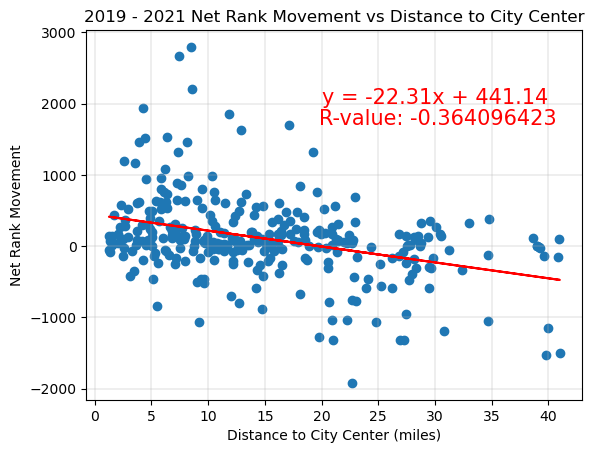

In [8]:
#2019 - 2021 Net Rank Movement vs Distance to City Center plot and linear regression
school_data_22_19_df['rankMovements']=school_data_22_19_df['ranks21']-school_data_22_19_df['ranks19']
x_values = school_data_22_19_df['Distance_to_City_Center']
y_values = school_data_22_19_df['rankMovements']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_value=f"R-value: {round(rvalue,9)}"
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,2000),fontsize=15,color="red")
plt.annotate(r_value,(19.8,1700),fontsize=15,color="red")
plt.xlabel('Distance to City Center (miles)')
plt.ylabel('Net Rank Movement')
plt.title('2019 - 2021 Net Rank Movement vs Distance to City Center')
plt.grid(linestyle='-', linewidth=.3)
plt.savefig('../P1_Figures/2019 - 2021 Net Rank Movement vs Distance to City Center')
plt.show()

In [9]:
#2022 Average Standard Scores hvplot by county
%%capture --no-display

#map_plot = school_data_22_21_df.loc[school_data_22_21_df['rankLevels']=='High'].hvplot.points(
map_plot = school_data_22_21_df.hvplot.points(
    "longs",
    "lats",
    geo = True,
    tiles = "OSM",
    frame_width = 800,
    frame_height = 600,
    size = "averageStandardScores22",
    scale = .8,
    color = "countyNames",
    title='2022 Average Standard Scores'
)
map_plot

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [longs,lats]   (countyNames,averageStandardScores22)

In [10]:
#2021 Average Standard Scores hvplot by county
map_plot = school_data_22_21_df.hvplot.points(
    "longs",
    "lats",
    geo = True,
    tiles = "OSM",
    frame_width = 800,
    frame_height = 600,
    size = "averageStandardScores21",
    scale = .8,
    color = "countyNames",
    title='2021 Average Standard Scores'
)

map_plot

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [longs,lats]   (countyNames,averageStandardScores21)

In [11]:
#2019 Average Standard Scores hvplot by county
map_plot = school_data_22_19_df.hvplot.points(
    "longs",
    "lats",
    geo = True,
    tiles = "OSM",
    frame_width = 800,
    frame_height = 600,
    size = "averageStandardScores19",
    scale = .8,
    color = "countyNames",
    title='2019 Average Standard Scores'
)

map_plot

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [longs,lats]   (countyNames,averageStandardScores19)

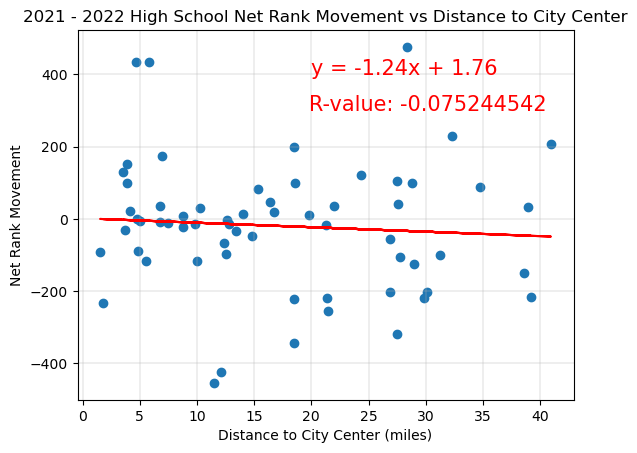

In [12]:
#2021 - 2022 High School Net Rank Movement vs Distance to City Center plot and linear regression
x_values = school_data_22_21_df.loc[school_data_22_21_df['rankLevels']=='High']['Distance_to_City_Center']
y_values = school_data_22_21_df.loc[school_data_22_21_df['rankLevels']=='High']['rankMovements']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_value=f"R-value: {round(rvalue,9)}"
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,400),fontsize=15,color="red")
plt.annotate(r_value,(19.8,300),fontsize=15,color="red")
plt.xlabel('Distance to City Center (miles)')
plt.ylabel('Net Rank Movement')
plt.title('2021 - 2022 High School Net Rank Movement vs Distance to City Center')
plt.grid(linestyle='-', linewidth=.3)
plt.savefig('../P1_Figures/2021 - 2022 High School Net Rank Movement vs Distance to City Center')
plt.show()

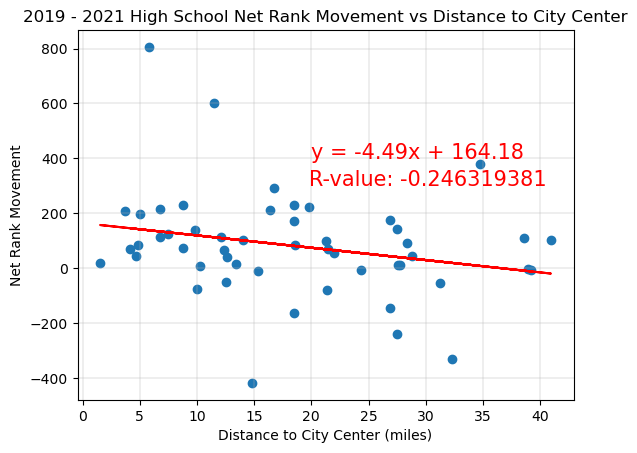

In [13]:
#2019 - 2021 High School Net Rank Movement vs Distance to City Center plot and linear regression
x_values = school_data_22_19_df.loc[school_data_22_19_df['rankLevels']=='High']['Distance_to_City_Center']
y_values = school_data_22_19_df.loc[school_data_22_19_df['rankLevels']=='High']['rankMovements']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_value=f"R-value: {round(rvalue,9)}"
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,400),fontsize=15,color="red")
plt.annotate(r_value,(19.8,300),fontsize=15,color="red")
plt.xlabel('Distance to City Center (miles)')
plt.ylabel('Net Rank Movement')
plt.title('2019 - 2021 High School Net Rank Movement vs Distance to City Center')
plt.grid(linestyle='-', linewidth=.3)
plt.savefig('../P1_Figures/2019 - 2021 High School Net Rank Movement vs Distance to City Center')
plt.show()

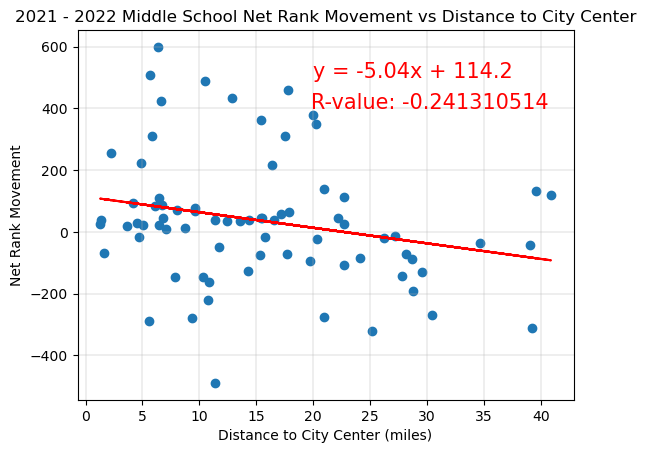

In [14]:
#2021 - 2022 Middle School Net Rank Movement vs Distance to City Center plot and linear regression
x_values = school_data_22_21_df.loc[school_data_22_21_df['rankLevels']=='Middle']['Distance_to_City_Center']
y_values = school_data_22_21_df.loc[school_data_22_21_df['rankLevels']=='Middle']['rankMovements']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_value=f"R-value: {round(rvalue,9)}"
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,500),fontsize=15,color="red")
plt.annotate(r_value,(19.8,400),fontsize=15,color="red")
plt.xlabel('Distance to City Center (miles)')
plt.ylabel('Net Rank Movement')
plt.title('2021 - 2022 Middle School Net Rank Movement vs Distance to City Center')
plt.grid(linestyle='-', linewidth=.3)
plt.savefig('../P1_Figures/2021 - 2022 Middle School Net Rank Movement vs Distance to City Center')
plt.show()

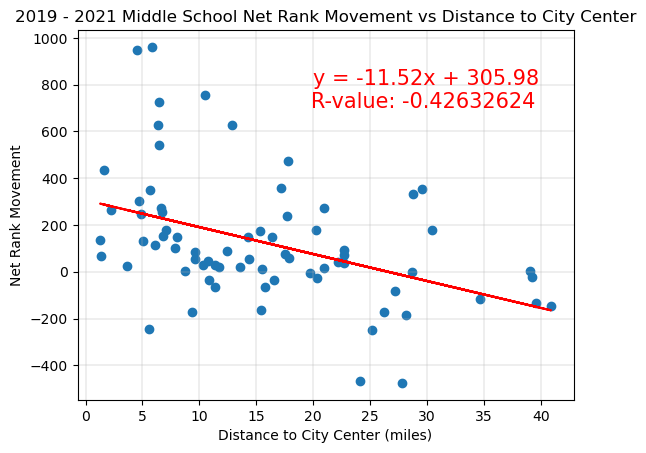

In [15]:
#2021 - 2022 Middle School Net Rank Movement vs Distance to City Center plot and linear regression
x_values = school_data_22_19_df.loc[school_data_22_19_df['rankLevels']=='Middle']['Distance_to_City_Center']
y_values = school_data_22_19_df.loc[school_data_22_19_df['rankLevels']=='Middle']['rankMovements']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_value=f"R-value: {round(rvalue,9)}"
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,800),fontsize=15,color="red")
plt.annotate(r_value,(19.8,700),fontsize=15,color="red")
plt.xlabel('Distance to City Center (miles)')
plt.ylabel('Net Rank Movement')
plt.title('2019 - 2021 Middle School Net Rank Movement vs Distance to City Center')
plt.grid(linestyle='-', linewidth=.3)
plt.savefig('../P1_Figures/2019 - 2021 Middle School Net Rank Movement vs Distance to City Center')
plt.show()

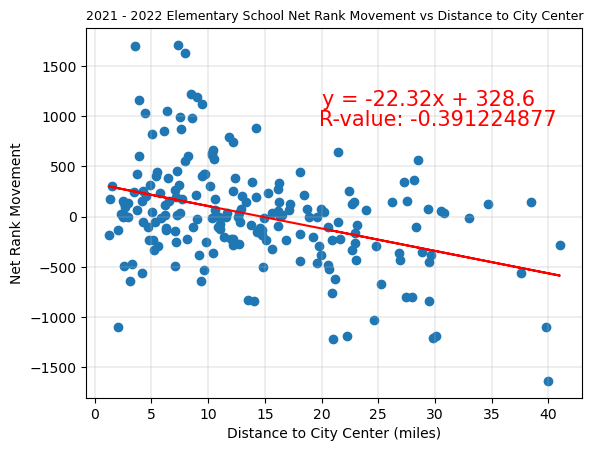

In [16]:
#2021 - 2022 Elementary School Net Rank Movement vs Distance to City Center plot and linear regression
x_values = school_data_22_21_df.loc[school_data_22_21_df['rankLevels']=='Elementary']['Distance_to_City_Center']
y_values = school_data_22_21_df.loc[school_data_22_21_df['rankLevels']=='Elementary']['rankMovements']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_value=f"R-value: {round(rvalue,9)}"
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,1100),fontsize=15,color="red")
plt.annotate(r_value,(19.8,900),fontsize=15,color="red")
plt.xlabel('Distance to City Center (miles)')
plt.ylabel('Net Rank Movement')
plt.title('2021 - 2022 Elementary School Net Rank Movement vs Distance to City Center',fontsize = 9)
plt.grid(linestyle='-', linewidth=.3)
plt.savefig('../P1_Figures/2021 - 2022 Elementary School Net Rank Movement vs Distance to City Center')
plt.show()

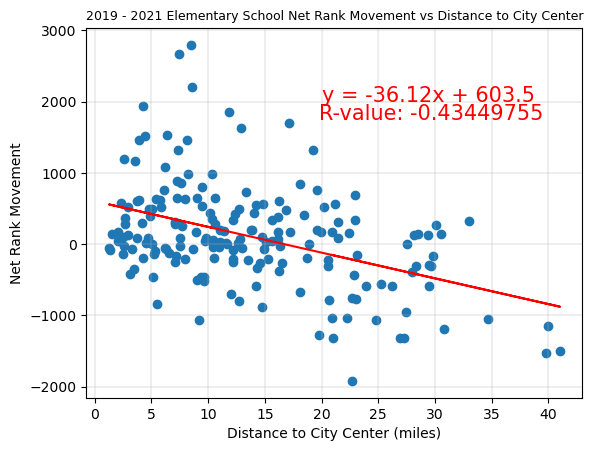

In [17]:
#2019 - 2021 Elementary School Net Rank Movement vs Distance to City Center plot and linear regression
x_values = school_data_22_19_df.loc[school_data_22_19_df['rankLevels']=='Elementary']['Distance_to_City_Center']
y_values = school_data_22_19_df.loc[school_data_22_19_df['rankLevels']=='Elementary']['rankMovements']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_value=f"R-value: {round(rvalue,9)}"
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,2000),fontsize=15,color="red")
plt.annotate(r_value,(19.8,1750),fontsize=15,color="red")
plt.xlabel('Distance to City Center (miles)')
plt.ylabel('Net Rank Movement')
plt.title('2019 - 2021 Elementary School Net Rank Movement vs Distance to City Center',fontsize = 9)
plt.grid(linestyle='-', linewidth=.3)
plt.savefig('../P1_Figures/2019 - 2021 Elementary School Net Rank Movement vs Distance to City Center')
plt.show()

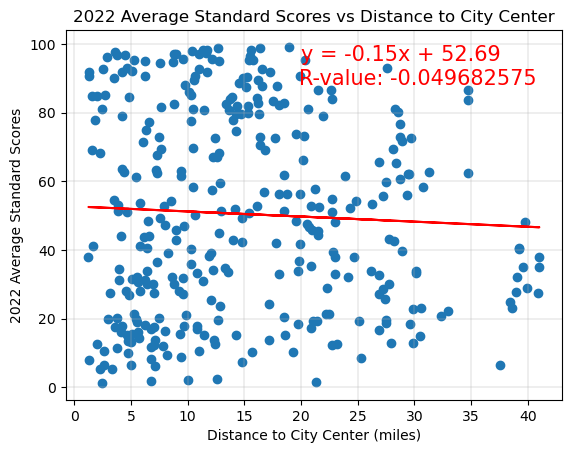

In [18]:
#2022 Average Standard Scores vs Distance to City Center plot and linear regression
x_values = school_data_22_21_df['Distance_to_City_Center']
y_values = school_data_22_21_df['averageStandardScores22']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_value=f"R-value: {round(rvalue,9)}"
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,95),fontsize=15,color="red")
plt.annotate(r_value,(19.8,88),fontsize=15,color="red")
plt.xlabel('Distance to City Center (miles)')
plt.ylabel('2022 Average Standard Scores')
plt.title('2022 Average Standard Scores vs Distance to City Center')
plt.grid(linestyle='-', linewidth=.3)
plt.savefig('../P1_Figures/2022 Average Standard Scores vs Distance to City Center')
plt.show()

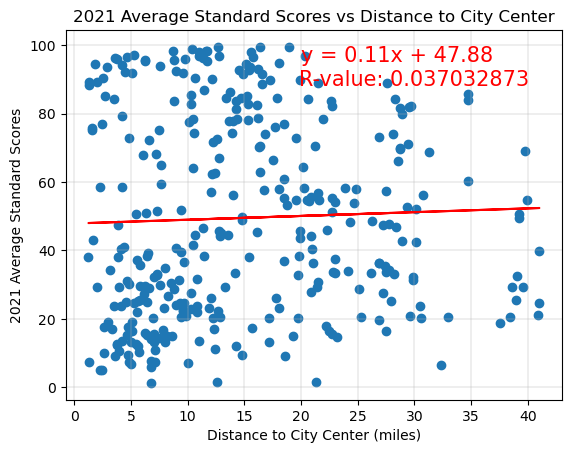

In [19]:
#2021 Average Standard Scores plot and linear regression
x_values = school_data_22_21_df['Distance_to_City_Center']
y_values = school_data_22_21_df['averageStandardScores21']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_value=f"R-value: {round(rvalue,9)}"
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,95),fontsize=15,color="red")
plt.annotate(r_value,(19.8,88),fontsize=15,color="red")
plt.xlabel('Distance to City Center (miles)')
plt.ylabel('2021 Average Standard Scores')
plt.title('2021 Average Standard Scores vs Distance to City Center')
plt.grid(linestyle='-', linewidth=.3)
plt.savefig('../P1_Figures/2021 Average Standard Scores vs Distance to City Center')
plt.show()

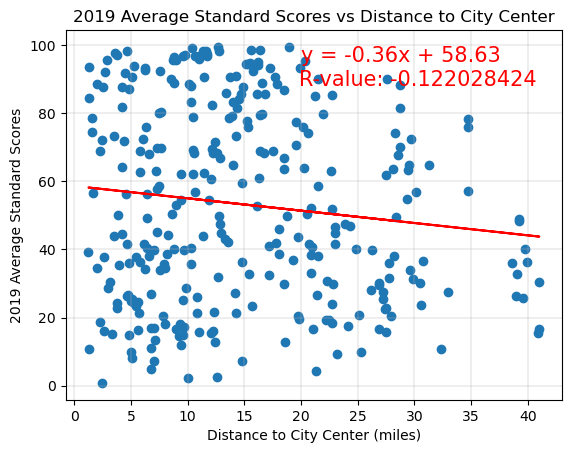

In [20]:
#2019 Average Standard Scores plot and linear regression
x_values = school_data_22_19_df['Distance_to_City_Center']
y_values = school_data_22_19_df['averageStandardScores19']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_value=f"R-value: {round(rvalue,9)}"
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,95),fontsize=15,color="red")
plt.annotate(r_value,(19.8,88),fontsize=15,color="red")
plt.xlabel('Distance to City Center (miles)')
plt.ylabel('2019 Average Standard Scores')
plt.title('2019 Average Standard Scores vs Distance to City Center')
plt.grid(linestyle='-', linewidth=.3)
plt.savefig('../P1_Figures/2019 Average Standard Scores vs Distance to City Center')
plt.show()